<img src="../../thu_sigs_logo.png" alt="清华深研院-横" style="zoom:50%;" />

In [ ]:
#| hide
#| default_exp tree
# pdf:
#   toc: true
#   docx: default

In [ ]:
#|hide
import matplotlib.pyplot as plt
plt.style.use('default')

::: {.callout-important}
本文档具有一定的交互性，建议使用浏览器打开html文件，这样比pdf文件阅读体验更佳。
:::

## 第一题——朴素贝叶斯法概率估计公式推导 {#sec-1}

题目如下

> 用贝叶斯估计法推出朴素贝叶斯法中的概率估计公式(4.10)和(4.11)
> $\begin{aligned}P_{\lambda}(X^{(j)}=a_{jl}|Y=C_{k})=& \frac{\sum_{i=1}^{N}I(x_{i}^{(j)}=a_{jl},y_{i}=c_{k})+\lambda}{\sum_{i=1}^{N}I(y_{i}=c_{k})+S_{j}\lambda}\end{aligned}$



::: {.callout-note}
TL; DR 前面审题内容较长，学习了一些这道题的一些背景知识方便理解。
对于题目的证明，可以直接跳到解题部分@sec-proof。
:::

### 审题

#### 4.10和4.11式是什么？题目所给的式子是另一个公式吗？

根据李航机器学习方法课本内容[@LiHang_2019] 54 页，

4.10 式就是题目汇中给的式子，即：
$$
\boldsymbol{P_{\lambda}(X^{(j)}=a_{jl}|Y=c_{k})=\frac{(\sum_{i=1}^{N}I(x_{i}^{(j)}=a_{jl},y_{i}=c_{k}))+\lambda}{(\sum_{i=1}^{N}I(y_{i}=c_{k}))+S_{j}\lambda}}
$$ {#eq-4-10}

书中说，用极大似然估计可能会出现所要估计的概率值为0的情况。这时会影响后验概率的计算
结果，使分类产生偏差。而上式就是为了解决这个问题而提出的，上式是对**条件概率的贝叶斯估计**，引入了一个新的参数$\lambda \ge 0$，等价于在每一个随机变量的取值频数都增加$\lambda$次。当 $\lambda=0$ 时，等价于使用极大似然估计， 当 $\lambda = 1$ 时，称为拉普拉斯平滑。

朴素贝叶斯需要知道怎么估计先验概率和条件概率（似然），刚才4.10估计了条件概率，接下来4.11式是估计先验概率怎么用上拉普拉斯平滑，即：
$$
P_{\lambda}\left(Y=c_{k}\right)=\frac{(\sum_{i=1}^{N} I\left(y_{i}=c_{k}\right))+\lambda}{N+K \lambda}
$$ {#eq-4-11}

::: {.callout-warning}
李航书上的原式对括号的位置不清晰，让人分不清楚$+\lambda$ 是在求和操作$\sum$的里面还是外面。为了避免歧义，我们上面已经修改，加上了括号，即$+\lambda$的操作是在求和操作$\sum$结束之后。
:::




#### 本题要从什么推导到什么？

4.10和4.11都是推导的结果，即贝叶斯估计的结果，但是李航书上没有说具体为什么加上$\lambda$ 就是贝叶斯估计了，具体是怎么贝叶斯估计的，所以本题需要我们推导。

#### 以上公式中的符号是什么含义？
我们需要了解 [@eq-4-10] 和 [@eq-4-11] 中的符号含义。

- 首先最基础的
    - $ X \subseteq R^n $：表示输入空间是n维向量集合。
    - $ Y = { c_1, c_2,..., c_K } $：输出空间为类别标签集合，共有K个不同的类。
    - 输入特征向量 $ x \in X $，输出类别标签（class label）$ y \in Y $。X是在输入空间上的随机变量，Y是在输出空间上的随机变量。
    - P(X,Y) 是X和Y的联合概率分布。
    - 训练数据集T由N对独立的同分布产生的样本组成，每对包括一个来自X的特征向量和一个来自Y的类别标签。
- 实际上为了方便推导，这里$X^{(j)}$ 的取值是离散的，并不是$R^n$上的连续随机变量。
    - 这里假设设第j个特征$x^{(i)}$可能取值的集合为$\{a_{j_1},a_{j_2},…,a_{j_{S_j}}\}$, 其中$S_j$为第j个特征的取值个数。$a_{jl}$用下标$l$来表示是第几个取值。
    - $I$为指示函数。

::: {.callout-note}
李航书上推导的是[Categorical Naive Bayes][MultinomialNB]，输入的是离散型随机变量。如果是连续型随机变量，则需要使用[Gaussian Naive Bayes][GaussianNB]。
:::

[CategoricalNB]: https://scikit-learn.org/1.5/modules/naive_bayes.html#categorical-naive-bayes
[MultinomialNB]: https://scikit-learn.org/1.5/modules/naive_bayes.html#multinomial-naive-bayes
[GaussianNB]: https://scikit-learn.org/1.5/modules/naive_bayes.html#gaussian-naive-bayes


#### 一个问题，式子[@eq-4-10] 和 式子[@eq-4-11]中的$\lambda$是同一个参数吗？
- 如果按照李航书上说的“在随机变量各个取值的频数上赋予一个正数$\lambda$”，那么比较难理解，到底是在$X^{(j)}$的每个取值上面加一共$S_j$次经验，还是在Y的每个类别上一共加上$K$次经验？
- 这两个都取1不会矛盾吗？
- 根据例题4.2，实际上就是都是取1。




### 解题

#### 总体推导原则

朴素贝叶斯法需要学习 $P(Y=c_k)$ 和 $P(X^{(j)}|Y=c_k)$ 这两系列的参数，所谓学习就是通过统计学方法对参数进行估计。
给定一个具体的数据集，极大似然估计的意思是计算出上面这两个参数每一个具体取值下，数据集如此出现的概率（似然），通过最大化这个似然，我们可以得到最有可能的模型参数。

而贝叶斯估计法，根据我们PPT课件中学习的知识，则是认为$P(Y=c_k)$ 和 $P(X^{(j)}|Y=c_k)$参数本身作为随机变量，具有先验分布，在我们观察到数据集$T = \{(x_1,y_1), ..., (x_N,y_N)\}$之后，我们后验地更新我们对这两个参数分布的认知，最后可能以参数分布的期望或者使得后验最大的值作为我们对参数的估计。

根据课件上的内容，最后决策的时候，也可以不使用参数的估计，而是把整个参数的后验分布拿过来，去积分来对预测值求一个分布，称为后验预测分布。
#### 符号简化

我们记$P(Y=c_k)$这k个参数为随机向量$\theta_k$

记$P(X^{(j)}=a_{jl}|Y=c_k)$这j个参数为随机向量$\theta_{kl}$

#### 取什么共轭先验分布？{#sec-prior}

$\theta_k=P(Y=c_k)$ 中有K个参数，需要满足加起来等于1，而且每个值非负的约束条件。

$\theta_{kl}=P(X^{(j)}|Y=c_k)$ 我们不妨只管第j个特征，其他的特征是独立的，推导起来是一样的，那么j是已知了，这里需要估计$S_j \times K$ 个参数。同样也需要满足约束条件，对于每个具体的$c_k$, $\boldsymbol{P(X^{(j)}=a_{jl}|Y=c_{k})}$ 所有$X^{(j)}$取值加起来等于1，以及取值非负。

对于这种要求加起来等于1的约束条件，可以选择[狄利克雷分布（Dirichlet Distribution）][Dirichlet Distribution]作为先验分布。狄利克雷分布又称[多元Beta分布(multivariate Beta distribution)][多元Beta分布]。

设随机变量$\theta_k$组成的随机向量$\theta_{1:k}$ 服从 $Dir(\alpha_{1:k})$，其中$\alpha_{1:k}$ 是先验分布的超参数，是一个K维向量，且每个元素$\alpha_k>0$。
$$
P(\theta_{1:k} | \alpha_{1:k}) = \frac{1}{B(\alpha_{1:k})} \prod_{k=1}^K \theta_k^{\alpha_k-1}
$$

为了进一步简化问题，我们不妨认为这个分布是对称狄利克雷分布，即$\forall k, \alpha_k=\lambda$。$\lambda$被称为浓度参数。



[Dirichlet Distribution]: https://zh.wikipedia.org/wiki/%E7%8B%84%E5%88%A9%E5%85%8B%E9%9B%B7%E5%88%86%E5%B8%83

[多元Beta分布]: https://baike.baidu.com/item/%E7%8B%84%E5%88%A9%E5%85%8B%E9%9B%B7%E5%88%86%E5%B8%83/12728892


#### 推导4.11式（朴素贝叶斯的"类别先验分布"参数的贝叶斯估计后验分布） {#sec-proof}

根据贝叶斯公式，我们有：
$$
\begin{aligned}
P(\theta_{1:k} | \alpha_{1:k}, T_{1:N}) &= \frac{P(T_{1:N} | \theta_{1:k}, \alpha_{1:k}) P(\theta_{1:k}|\alpha_{1:k})}{P(T_{1:N}| \alpha_{1:k})} \\
 &\propto P(T_{1:N} | \theta_{1:k}, \alpha_{1:k}) P(\theta_{1:k}|\alpha_{1:k}) \\
 &= P(T_{1:N} | \theta_{1:k}) P(\theta_{1:k}|\alpha_{1:k}) \\
 &= likelihood \times prior \\
\end{aligned} 
$$

1. 其中数据集的似然函数，我们有：
$$
\begin{aligned}
P(T_{1:N} | \theta_{1:k}) &= \prod_{n=1}^N P(t_n|\theta_{1:k}) \\
\end{aligned} 
$$
其中 $P(t_n|\theta_{1:k})$ 的值是，如果$t_n = (x_n, y_n)$的$y_n = c_k$, 则值为 $\theta_k$, 
也就是 $P(t_n|\theta_{1:k}) = \prod_{k=1}^K I(y_n = c_k) \times \theta_{k}$。

据此我们可以换一下整个式子求积的方式，原本是对每一个样本求积，现在我们只需要对每个类别求积即可：

$$
\begin{aligned}
P(T_{1:N} | \theta_{1:k}) &= \prod_{k=1}^K \theta_{k}^{N_k} \\
\end{aligned} 
$$


2. 而对于先验分布，代入@sec-prior的狄利克雷分布公式：
$$
\begin{aligned}
P_{\lambda}(\theta_{1:k}|\alpha_{1:k}) &= \frac{1}{B(\lambda)} \prod_{k=1}^K \theta_k^{\lambda-1}
\end{aligned} 
$$



3. 根据1.和2.，我们有后验分布：

$$
\begin{aligned}
P(\theta_{1:k} | \alpha_{1:k}, T_{1:N}) &\propto likelihood \times prior \\
&\propto \prod_{k=1}^K \theta_k^{N_k + \lambda-1}
\end{aligned}
$$

$\theta_{1:k}$ 在已知$\alpha_{1:k}, T_{1:N}$的情况下，服从对称Dirichlet分布 $Dir(\alpha_{N_k + \lambda})$。

而Dirichlet分布每一个$\theta_k$的期望为其对应的参数$\alpha_k$的占比。

因此，我们就可以用后验分布的期望来估计$\theta_{1:k}$。

$$
\begin{aligned}
P_{\lambda}\left(Y=c_{k}\right) &= \hat{\theta_k} \\
    &= E(\theta_k| \lambda, T_{1:N}) \\
    & = \frac{N_k + \lambda}{\sum_{k=1}^K (N_k + \lambda)} \\
    &=\frac{(\sum_{i=1}^{N} I\left(y_{i}=c_{k}\right))+\lambda}{N+K \lambda}
\end{aligned}

$$
即 [@eq-4-11] 式。


#### 推导4.10式（朴素贝叶斯的"条件概率"参数的贝叶斯估计后验分布） {#sec-proof2}

类似于@sec-prior，我们首先要定义条件概率$\theta_{kl}$ 的先验分布

设随机变量$\theta_{kl}$组成的随机向量${\theta_k}_{1:l}$ 服从 $Dir({\alpha_k}_{1:l})$，其中${\alpha_k}_{1:l}$ 是先验分布的超参数，是一个$S_j$维向量，且每个元素$\alpha_{kl}>0$。
$$
P(\theta_{k1:l} | \alpha_{k1:l}) = \frac{1}{B(\alpha_{k1:l})} \prod_{l=1}^{S_j} \theta_{kl}^{\alpha_{kl}-1}
$$

同理，为了进一步简化问题，我们不妨认为这个分布是对称狄利克雷分布，即$\forall l, \alpha_{kl}=\lambda$。$\lambda$被称为浓度参数。
> 这里回答了上面我提出的问题，实际上两个式子的$\lambda$可以不一样，这取决于使用朴素贝叶斯的人的偏好和经验，由于正好我们都要做拉普拉斯平滑，也就是$\lambda=1$，所以正好两个$\lambda$相等，但是也可以是不同的。


与@sec-proof类似，我们可以做一样的推导，只是把符号替换
- K替换为$S_j$
- $\theta_{k}$替换为${\theta_kl}$
- $\alpha_{k}$替换为${\alpha_kl}$


$$
\begin{aligned}
P_{\lambda} (X^{(j)}=a_{jl}|Y=c_{k}) 
  &= \hat{\theta_{kl}} \\
   &= E(\theta_{kl}|\lambda, T_{1:N}) \\
    &=\frac{(\sum_{i=1}^{N}I(x_{i}^{(j)}=a_{jl},y_{i}=c_{k}))+\lambda}{(\sum_{i=1}^{N}I(y_{i}=c_{k}))+S_{j}\lambda}
\end{aligned}
$$ 

### 题目扩展问题

#### 贝叶斯估计的先验是否可以被任意地操控，让我们的后验分布变成任意的分布？如果是这样，那么我们如何保证先验分布的合理性？

#### 贝叶斯估计参数的后验分布的期望能否代替后验分布本身来预测新的数据的分布？




## 第二题 {#sec-2}

题目如下

> 已知如表5.2所示的训练数据，试用平方误差损失准则生成一个二叉回归树。

5.2 训练数据是


In [ ]:
import numpy as np
x = np.arange(1, 11)
y = np.array([4.5, 4.75, 4.91, 5.34, 5.80, 7.05, 7.90, 8.23, 8.70, 9.00])
x, y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([4.5 , 4.75, 4.91, 5.34, 5.8 , 7.05, 7.9 , 8.23, 8.7 , 9.  ]))

### 审题
数据可视化如下

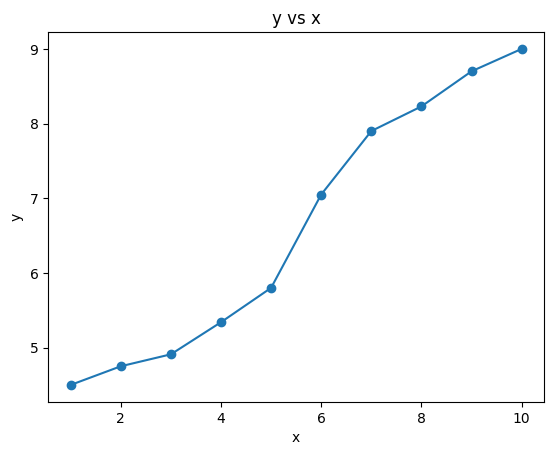

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')
plt.show()

平方误差损失准则是什么？二叉回归树是什么？

CART（Classification and Regression Tree）方法就是"分类与回归树"方法，CART对于输入X构建的决策树是二叉树，这里的分类与回归指的是输出变量Y是离散的还是连续的。CART认为回归树是要用平方误差作为损失函数，而分类树是要用基尼系数作为损失函数，所谓“准则”是指构建树的时候用损失函数来决定用哪个输入的属性来划分节点。

具体来说，就是划分前后损失函数的变化。



#### 解题

我们直接通过写代码（注意这里有参考一些网上的代码，但是我们每一行都认真审查过了）来加深自己的理解，实现书上算法5.5。
首先我们要定义二叉树的节点类，包括左右子树指针。

对于决策树而言，二叉树的节点还需要记录
- 特征 feature：记录当前节点划分的特征（用属性的编号j来表示）
- 切分值 split：是如何划分左右子树的
- 估计值 value：被划分到当前节点的输入可以用什么输出值（通过平均值）来估计

In [ ]:
import numpy as np

class Node:
    def __init__(self, feature=None, # 切分的特征
                 split=None,  # 切分的值
                 left:'Node'=None, # 左子树
                 right:'Node'=None, # 右子树
                 value=None # 叶子节点的预测值
                 ):
        self.feature = feature 
        self.split = split
        self.left:'Node' = left
        self.right:'Node' = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

下面我们来写回归树类。我们一个一个方法的写（得益于fastcore库的`patch`函数，我们可以渐进式地给Python类添加方法），首先是构造函数，指定算法的超参数。

原始的书上算法5.5 没有max_depth, 而 min_samples_split=2


In [ ]:
from fastcore.utils import patch
class RegressionTree:
    def __init__(self, min_samples_split=2, # 最少需要多少个样本才能分裂
                 max_depth=float('inf') # 最大深度，太深的话容易过拟合
                 ):
        self.min_samples_split = min_samples_split 
        self.max_depth = max_depth 
        self.root:'Node' = None # root 也就是不划分，用所有值的y的均值作为预测值

接下来我们可以看看怎么写回归树的训练算法。这里的关键是对输入空间如何进行划分。
CART是启发式（贪心）算法，每一次就按照最优特征和最优切分点来划分子空间。具体来说，CART算法的训练过程如下：

In [ ]:
@patch
def fit(self:RegressionTree, X, y):
    # 这里是对外的接口， 里面的_grow_tree是递归的过程
    self.root = self._grow_tree(X, y)

@patch
def _grow_tree(self:RegressionTree, 
                X, # 是划分后的子集
                y, # 是对应的标签
                depth=0 # 当前深度
    ):
    n_samples, n_features = X.shape
    n_labels = len(np.unique(y)) 

    # stopping criteria
    if (depth >= self.max_depth
            or n_labels == 1 # 只有一个值，就算有很多样本也不划分了。
            or n_samples < self.min_samples_split):
        leaf_value = np.mean(y)
        self._print_leaf(depth, leaf_value)
        return Node(value=leaf_value)

    # find the best split 这里是最难的地方，效率也比较低，需要对整个X的每一个特征都遍历一次。
    best_feature, best_split, best_score = self._best_split(X, y)
    self._print_split(depth, best_feature, best_split, best_score)
    
    # grow the children that result from the split
    left_indices, right_indices = self._split(X[:, best_feature], best_split)
    left_child = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
    right_child = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
    return Node(best_feature, best_split, left_child, right_child)

@patch
def _print_split(self:RegressionTree, depth, feature, split, score):
    print(f"{' ' * depth}Depth {depth}: Split on feature {feature} at value {split} with score {score}")

@patch
def _print_leaf(self:RegressionTree, depth, value):
    print(f"{' ' * depth}Depth {depth}: Leaf with value {value}")

@patch
def _best_split(self:RegressionTree, X, y):
    # 需要遍历所有的特征和所有可能的切分点，找到最佳切分点
    best_score = float('inf') # 这里我们假设越小越好。注意我们不需要算增益，其实只需要算划分之后的loss就行
    best_feature, best_split = None, None
    for feature_index in range(X.shape[1]):
        feature_values = X[:, feature_index]
        possible_splits = np.unique(feature_values) # 如果输入没有那么多就可以少算一点
        for split in possible_splits:
            left_indices, right_indices = self._split(feature_values, split)
            if len(left_indices) == 0 or len(right_indices) == 0: # 划分之后有一边没了，那就不考虑这个划分点。因为增益肯定是0。
                continue
            left_score = self._calculate_mse(y[left_indices])
            right_score = self._calculate_mse(y[right_indices])
            score = left_score + right_score
            if score < best_score: # 改进了
                best_score, best_feature, best_split = score, feature_index, split
    return best_feature, best_split, best_score
@patch
def _split(self:RegressionTree, feature_values, split):
    left_indices = np.where(feature_values <= split)
    right_indices = np.where(feature_values > split)
    return left_indices, right_indices

@patch
def _calculate_mse(self:RegressionTree, y):
    # 这里是y的子集，这个子集使用np.mean作为预测值，所以会有误差。  
    return np.mean((y - np.mean(y)) ** 2)

X = x.reshape(-1, 1)
reg_tree = RegressionTree(min_samples_split=2, max_depth=float('inf'))
reg_tree.fit(X, y)

Depth 0: Split on feature 0 at value 5 with score 0.6717439999999998
 Depth 1: Split on feature 0 at value 3 with score 0.08136666666666667
  Depth 2: Split on feature 0 at value 1 with score 0.006400000000000012
   Depth 3: Leaf with value 4.5
   Depth 3: Split on feature 0 at value 2 with score 0.0
    Depth 4: Leaf with value 4.75
    Depth 4: Leaf with value 4.91
  Depth 2: Split on feature 0 at value 4 with score 0.0
   Depth 3: Leaf with value 5.34
   Depth 3: Leaf with value 5.8
 Depth 1: Split on feature 0 at value 6 with score 0.17891874999999977
  Depth 2: Leaf with value 7.05
  Depth 2: Split on feature 0 at value 8 with score 0.049725000000000116
   Depth 3: Split on feature 0 at value 7 with score 0.0
    Depth 4: Leaf with value 7.9
    Depth 4: Leaf with value 8.23
   Depth 3: Split on feature 0 at value 9 with score 0.0
    Depth 4: Leaf with value 8.7
    Depth 4: Leaf with value 9.0


/home/ai_pitch_perfector/program_files/managers/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ai_pitch_perfector/program_files/managers/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


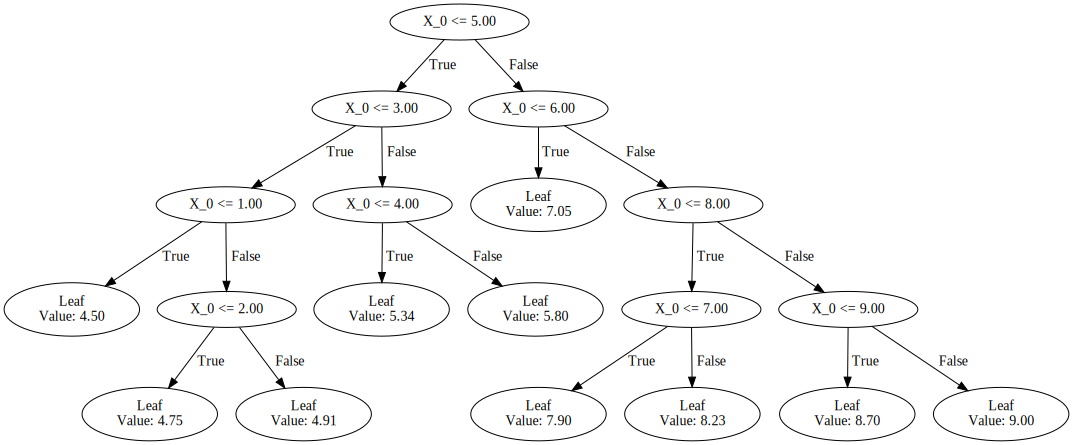

In [ ]:
from graphviz import Digraph

def visualize_node(node:Node, graph_label="Regression Tree"):
    # Create Digraph object
    dot = Digraph(comment=graph_label)

    # Helper function to recursively add nodes and edges
    def add_nodes_edges(node, parent_node_id=None):
        # If node is a leaf, add it to the graph
        if node.is_leaf_node():
            node_id = str(id(node))
            dot.node(node_id, f"Leaf\nValue: {node.value:.2f}")
        else:
            # Add current node to the graph
            node_id = str(id(node))
            dot.node(node_id, f"X_{node.feature} <= {node.split:.2f}")

            # Recursively add left and right children
            left_child_id = add_nodes_edges(node.left, node_id)
            right_child_id = add_nodes_edges(node.right, node_id)

            # Add edges from current node to its children
            dot.edge(node_id, left_child_id, label="True")
            dot.edge(node_id, right_child_id, label="False")

        return node_id

    # Start from the root node
    add_nodes_edges(node)

    return dot

@patch
def visualize(self:RegressionTree):
    return visualize_node(self.root)

# Visualize the tree
dot = reg_tree.visualize()
dot.render('regression_tree', format='png', cleanup=True)  # Save the tree as an image
'(regression_tree.png)'
dot

接下来是第二步，有了这个决策树，怎么预测新的数据呢？

In [ ]:
@patch
def predict(self:RegressionTree, X):
    # 对于新的输入，预测值怎么计算呢，对每一个值去做。
    self.decision_paths = [] 
    return np.array([self._predict_sample(x) for x in X])

@patch
def _predict_sample(self:RegressionTree, inputs):
        node:Node = self.root
        path = []  # Track the decision path
        while not node.is_leaf_node():
            path.append(node)
            if inputs[node.feature] <= node.split:
                node = node.left
            else:
                node = node.right
        path.append(node)  # Add the leaf node to the path
        self.decision_paths.append(path)
        return node.value

predictions = reg_tree.predict(X)
predictions

array([4.5 , 4.75, 4.91, 5.34, 5.8 , 7.05, 7.9 , 8.23, 8.7 , 9.  ])

因为我们没有限制深度，所以predictions应该与真实值相同。

In [ ]:
predictions - y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

如果我们有最大深度设为2，那么可以画出下面的图

/home/ai_pitch_perfector/program_files/managers/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ai_pitch_perfector/program_files/managers/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Depth 0: Split on feature 0 at value 5 with score 0.6717439999999998
 Depth 1: Split on feature 0 at value 3 with score 0.08136666666666667
  Depth 2: Leaf with value 4.72
  Depth 2: Leaf with value 5.57
 Depth 1: Split on feature 0 at value 6 with score 0.17891874999999977
  Depth 2: Leaf with value 7.05
  Depth 2: Leaf with value 8.4575


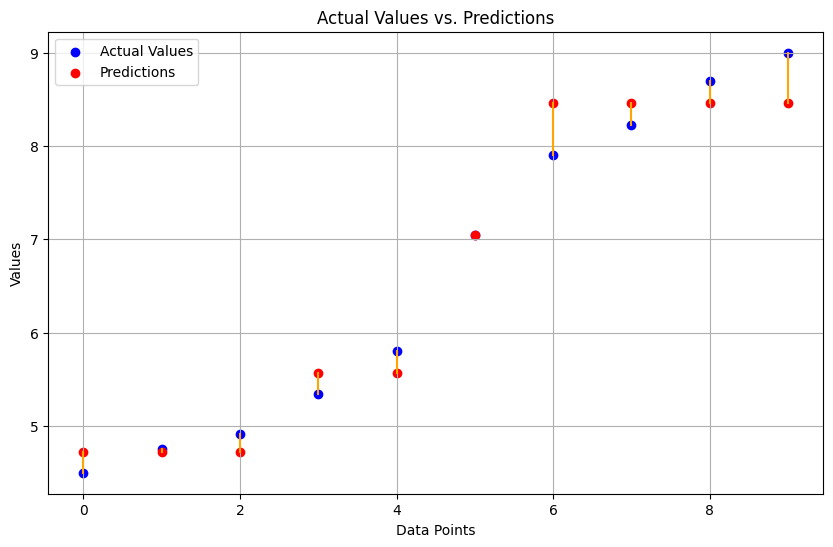

In [ ]:
import matplotlib.pyplot as plt

reg_tree = RegressionTree(max_depth=2)
reg_tree.fit(X, y)
predictions = reg_tree.predict(X)

# Scatter plot for actual values and predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Actual Values')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predictions')

# Highlight the difference
for i, (act, pred) in enumerate(zip(y, predictions)):
    plt.plot([i, i], [act, pred], color='green' if act == pred else 'orange')

plt.title('Actual Values vs. Predictions')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


### 题目扩展问题


这里我们产生一个疑问，划分一定能改进训练损失吗？有没有可能信息增益是负的，划分之后反而loss更大？

我们其实想问，$$MSE(E(l_1), l_1) + MSE(E(l_2), l_2) \le MSE(E(l_1+l_2), l_1+l_2)$$ 这个不等式是否恒成立？
其中 $l_1$ 和 $l_2$ 是两个任意实数列表， $l_1+l_2$ 是两个列表的拼接。